# Trabajo Con dos variables (x,t)-Elaboracion de los datos 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from pydmd import DMD,DMDBase,dmdbase,BOPDMD
from pydmd.plotter import plot_eigs, plot_summary,plot_eigs_mrdmd,_enforce_ratio,_plot_limits,plot_eigs
from pydmd.preprocessing import hankel_preprocessing
from pydmd import DMD
import pickle

In [2]:
# Function Nº1
def f1(x, t):
    return 1.0 / np.cosh(x + 3) * np.cos(2.3 * t)

# Function Nº2
def f2(x, t):
    return 2.0 / np.cosh(x) * np.tanh(x) * np.sin(2.8 * t)

# number of grid points along space dimension (n)
nx = 65  

# number of grid points along time dimension (m)
nt = 129  

# Define the space and time grid for data collection.
x = np.linspace(-5, 5, nx)
t = np.linspace(0,10, nt)

# Es como hacer un producto vectorial para crear el espacio 2-D (65x129)
xgrid, tgrid = np.meshgrid(x, t)

# Step of snapshot
dt = t[1] - t[0]  

print(f"el tamanho de snapshot es de : {dt}")

# Data consists of 2 spatiotemporal signals.
X1 = f1(xgrid, tgrid)
X2 = f2(xgrid, tgrid)

# Data sumada
X = X1 + X2

# Make a version of the data with noise.
mean = 0
std_dev = 0.01

# Matriz aleatoria 
random_matrix = np.random.normal(mean, std_dev, size=(nt, nx))

Xn = X + random_matrix

X.shape

# Tamanho de los elementos creados 

print(X.shape)

el tamanho de snapshot es de : 0.078125
(129, 65)


# Graficando los datos generados

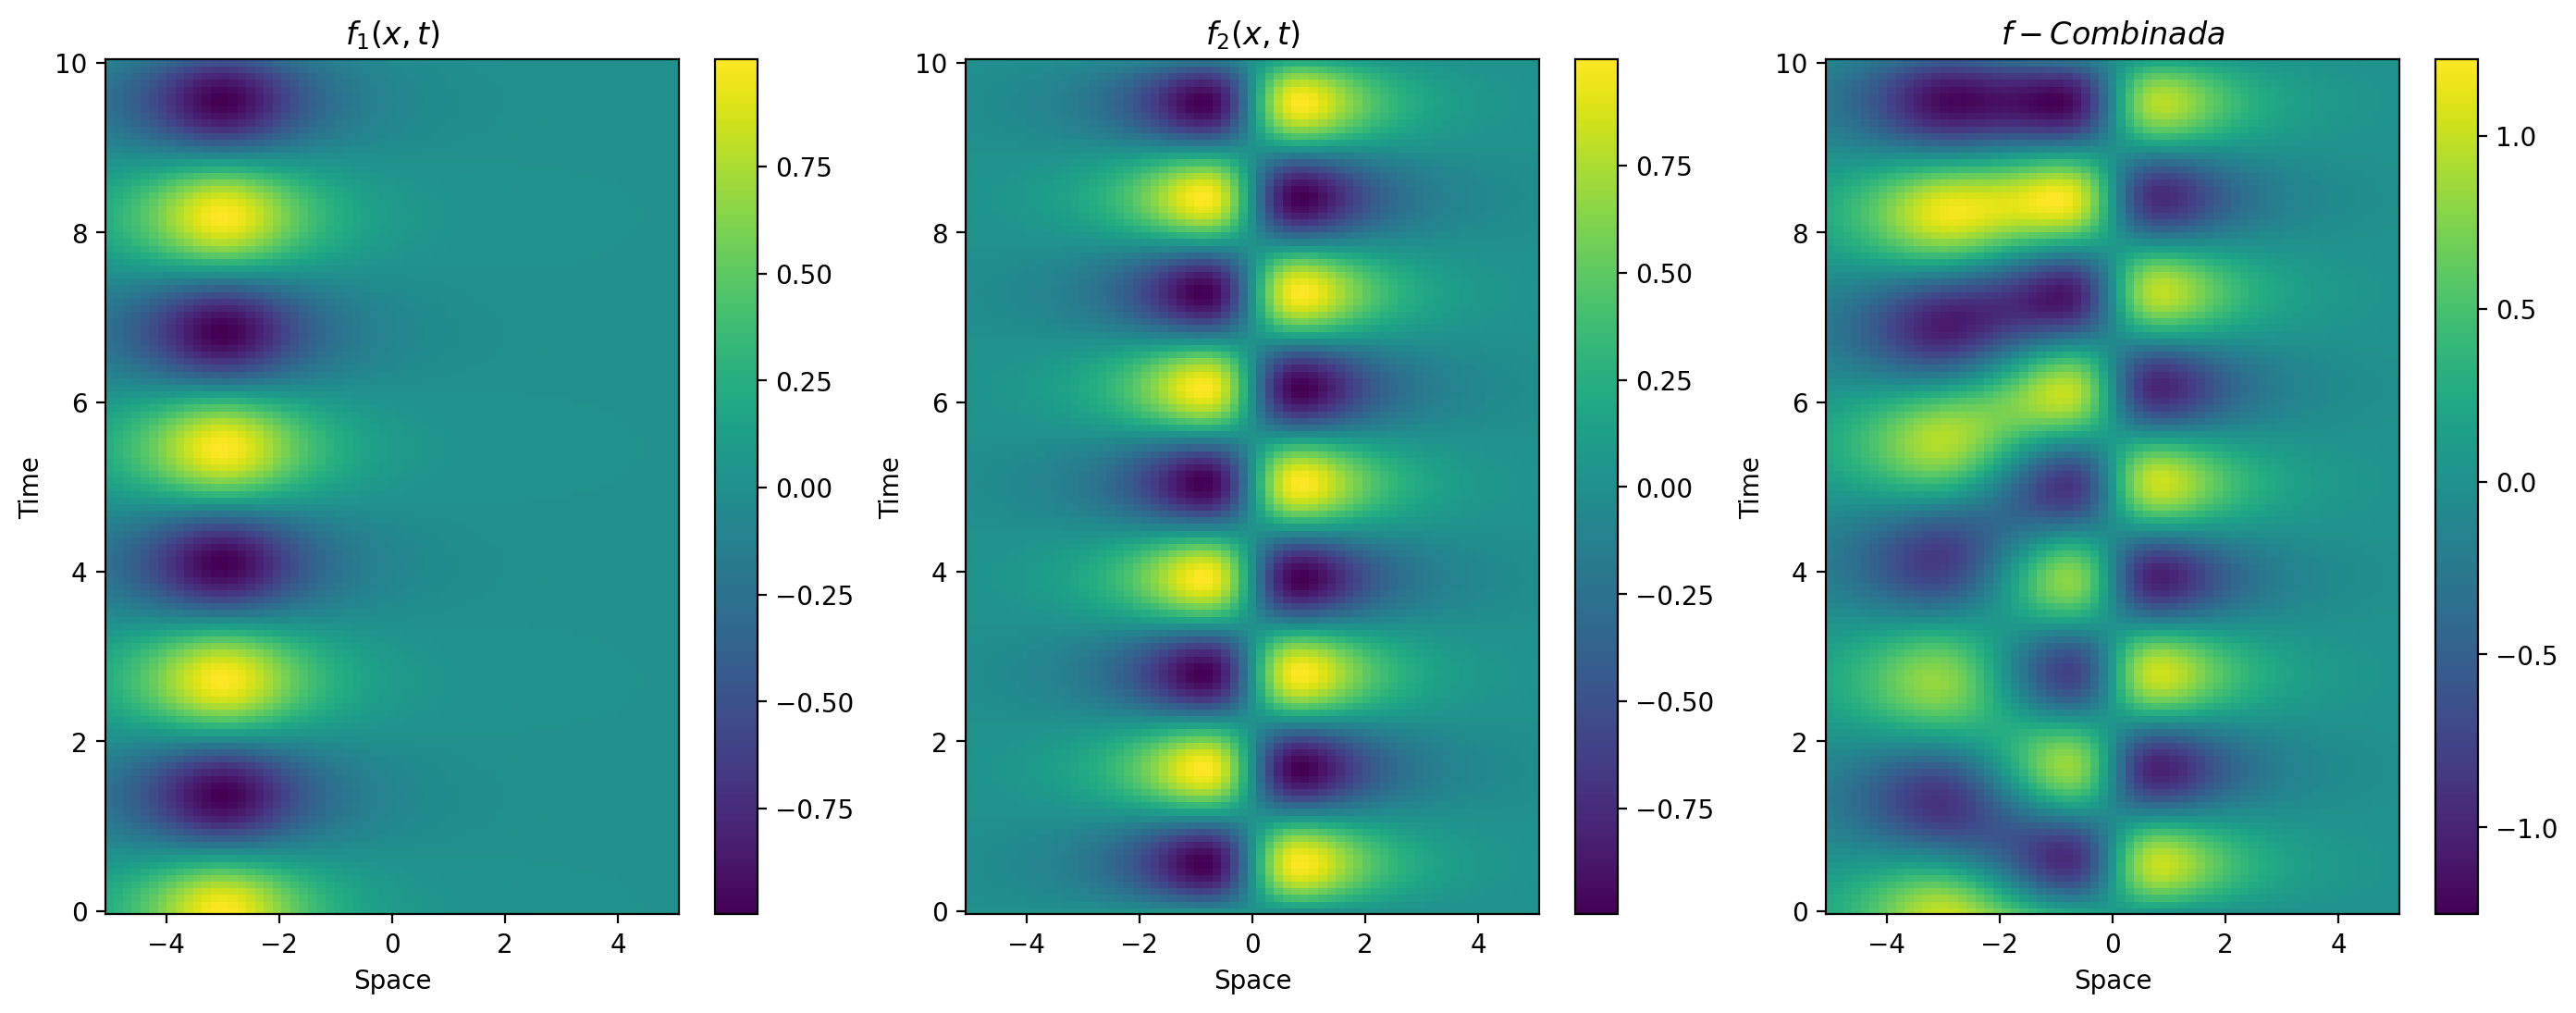

In [3]:
titles = ["$f_1(x,t)$", "$f_2(x,t)$", "$f-Combinada$"]

data = [X1, X2, X]

fig = plt.figure(figsize=(17, 6), dpi=200)

for n, title, d in zip(range(131, 134), titles, data):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, d.real)
    plt.title(title)
    plt.xlabel("Space")
    plt.ylabel("Time")
    plt.colorbar()
    
plt.show()

# DMD com dados perfeitos (Dados de simulação limpos)

**Começamos apresentando os seguintes resultados para sabermos o que devemos esperar quando aplicamos o DMD a este conjunto de dados. Abordaremos mais detalhadamente as etapas individuais de como usar o PyDMD posteriormente.**

Observe que, por construção, nosso conjunto de dados é completamente real (ou seja, não possui componentes imaginários) e contém 2 características espaço-temporais distintas que oscilam no tempo. Portanto, um modelo DMD bem-sucedido não deve apenas ser capaz de reconstruir fielmente os dados de entrada, mas também deve ser capaz de desambiguar os 2 modos espaciais, bem como recuperar suas respectivas frequências de oscilação.
ω1=23
ω2=2.8
Para capturar tais oscilações de conjuntos de dados reais, precisaremos de **2 autovalores DMD para cada oscilação: um para capturar a frequência da oscilação e outro para capturar seu conjugado complexo**. Portanto, para nosso conjunto de dados específico, precisamos de pelo menos 4 autovalores/modos DMD para capturar toda a extensão de nossos dados. Também precisaremos de pré-processamento de dados com atraso de tempo para recuperar essa estrutura de classificação 4, mas falaremos mais sobre isso mais tarde.

Como nossos dados são uniformemente espaçados no tempo e suficientemente dimensionados depois de pré-processarmos adequadamente nossos dados, o DMD exato (implementado pelo DMD) é capaz de extrair com sucesso os 2 modos espaço-temporais que compõem nosso sistema, desde que usemos dados limpos.

Os resultados apresentados abaixo são resultados essencialmente perfeitos.

-o atributo `modes` uma matriz numpy 2D onde as colunas são as estruturas de baixo escalão individualizadas

-o atributo `dynamics` é um array numpy 2D onde as linhas referem-se à evolução temporal de cada modo

-o atributo `eigs`  refere-se aos autovalores do operador de baixa dimensão

-o atributo `amplitudes` fornece os coeficientes do modo espaço-temporal usados ​​para reconstrução

-o atributo `reconstructed_data` refere-se à evolução aproximada do sistema

Informaciones sobre el Pre-procesamiento
tamanho de la matriz antes de la transformacion: (129, 65)
El tipo de archivo de 'dmd' es : <class 'pydmd.dmd.DMD'>
El valor de 'd' usado es de 3


Informaciones sobre el Procesamiento
El tipo de archivo de 'Modes' es : <class 'numpy.ndarray'> ------ El tamanho de la matriz de 'Modes'  : (195, 4)
El tipo de archivo de 'dynamics' es : <class 'numpy.ndarray'> ------ El tamanho de la matriz de 'dynamics'  : (4, 127)
El tipo de archivo de `eigs` es : <class 'numpy.ndarray'> ------ El tamanho de la matriz de `eigs`  : (4,)
El tipo de archivo de la matriz 'diag' es : <class 'numpy.ndarray'> ------ El tamanho de la matriz 'diag'  : (4, 4)
El tipo de archivo de `amplitudes` es : <class 'numpy.ndarray'> ------ El tamanho de la matriz de `amplitudes`  : (4,)
El tipo de archivo de `reconstructed_data` es : <class 'numpy.ndarray'> ------ El tamanho de la matriz de `reconstructed_data`  : (65, 129)
El determinante 'Original' es 42.85333336001484
El determina

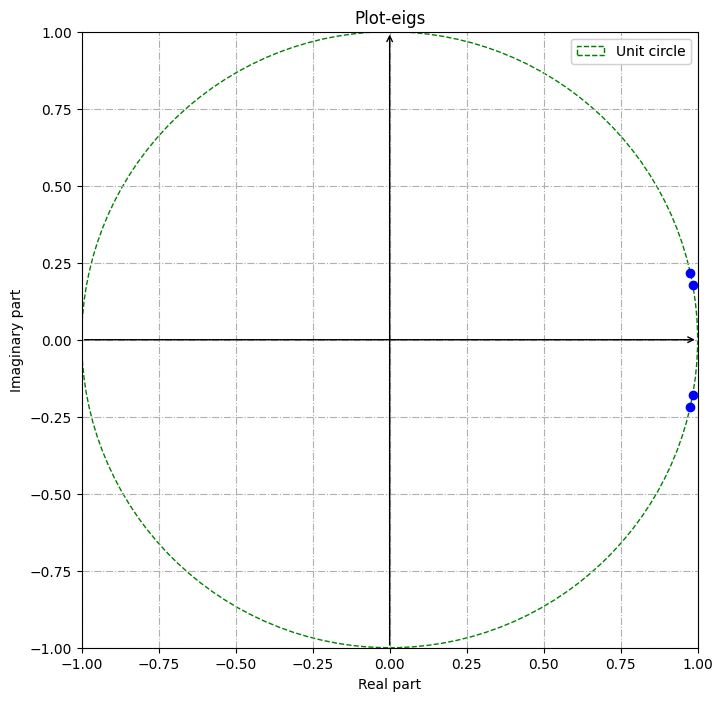



Reconstructed Data


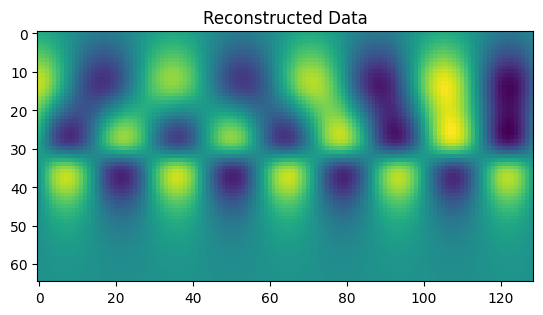

Clean Ground Truth Data


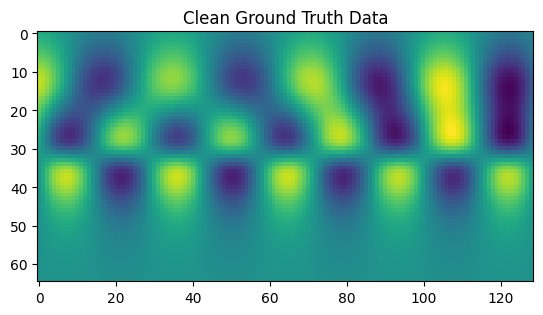

In [4]:
###################################### Pre-procesamiento de los datos ##############################

# Incorporação com atraso de tempo (d é o número de incorporações com atraso)
d = 3
# classDMD(svd_rank=0, tlsq_rank=0, exact=False, opt=False, rescale_mode=None, forward_backward=False, sorted_eigs=False, tikhonov_regularization=None)
dmd = DMD(svd_rank=0)
# El tipo de variable es : pydmd.dmd.DMD
print("Informaciones sobre el Pre-procesamiento")
print(f"tamanho de la matriz antes de la transformacion: {X.shape}")
print(f"El tipo de archivo de 'dmd' es : {type(dmd)}")
print(f"El valor de 'd' usado es de {d}")
# ClassHankelDMD(svd_rank=0, tlsq_rank=0, exact=False, opt=False, rescale_mode=None, forward_backward=False, d=1, sorted_eigs=False, reconstruction_method='first', tikhonov_regularization=None)
delay_dmd = hankel_preprocessing(dmd, d=d)

###################################### Pre-procesamiento de los datos ##############################


###################################### Procesamiento de los datos ##############################
delay_dmd.fit(X.T)
###################################### Procesamiento de los datos ##############################


###################################### Post-Procesamiento  ######################################


# coeficientes do modo espaço-temporal usados ​​para reconstrução (b)
delay_dmd.amplitudes

# informações sobre a janela de tempo usada para reconstruir/prever usando esta instância DMD
delay_dmd.dmd_time

# Obtenha os intervalos de tempo dos estados reconstruídos.
delay_dmd.dmd_timesteps

# `dynamics` é um array numpy 2D onde as linhas referem-se à evolução temporal de cada modo
delay_dmd.dynamics

# `eigs` autovalores do operador de baixa dimensão
delay_dmd.eigs

# Obtenha o espectro de amplitude
delay_dmd.frequency

# Valores da taxa de crescimento relativos aos modos
delay_dmd.growth_rate


# Matriz numpy 2D onde as colunas são as estruturas de baixo escalão individualizadas
delay_dmd.modes

# La instância do DMDOperator.
delay_dmd.operator

# os dados de entrada (espaço nivelado).
delay_dmd.snapshots

# Obtenha a forma original do instantâneo de entrada.
delay_dmd.snapshots_shape


# `reconstructed_data` refere-se à evolução aproximada do sistema
delay_dmd.reconstructed_data.real

# Matriz diagonal con autovalores
matriz=np.diag(delay_dmd.eigs)

print("\n")
print("Informaciones sobre el Procesamiento")
print(f"El tipo de archivo de 'Modes' es : {type(delay_dmd.modes)} ------ El tamanho de la matriz de 'Modes'  : {delay_dmd.modes.shape}")
print(f"El tipo de archivo de 'dynamics' es : {type(delay_dmd.dynamics)} ------ El tamanho de la matriz de 'dynamics'  : {delay_dmd.dynamics.shape}")
print(f"El tipo de archivo de `eigs` es : {type(delay_dmd.eigs)} ------ El tamanho de la matriz de `eigs`  : {delay_dmd.eigs.shape}")
print(f"El tipo de archivo de la matriz 'diag' es : {type(matriz)} ------ El tamanho de la matriz 'diag'  : {matriz.shape}")
print(f"El tipo de archivo de `amplitudes` es : {type(delay_dmd.amplitudes)} ------ El tamanho de la matriz de `amplitudes`  : {delay_dmd.amplitudes.shape}")
print(f"El tipo de archivo de `reconstructed_data` es : {type(delay_dmd.reconstructed_data.real)} ------ El tamanho de la matriz de `reconstructed_data`  : {delay_dmd.reconstructed_data.real.shape}")
print(f"El determinante 'Original' es {np.linalg.norm(X)}")
print(f"El determinante 'Reconstruido' es {np.linalg.norm(delay_dmd.reconstructed_data.real)}")
print("\n")



# Frecuencia de los valores imaginarios (Aray de vuelta )
print("\n")
print("Frecuencia de los valores imaginarios")
print(f"Frequencies (imaginary component): {np.round(np.log(delay_dmd.eigs) / dt, decimals=2)}")
print("\n")

# Grafico de los autovalores  
print("Grafico de los autovalores obtenidos")
plot_eigs(delay_dmd , show_axes=True , show_unit_circle=True , figsize=(8 , 8) , title='Plot-eigs')
print("\n")

# Imagen de la reconstruccion del sistema efectuada por DMD
print("Reconstructed Data")
plt.title("Reconstructed Data")
plt.imshow(delay_dmd.reconstructed_data.real)
plt.show()

# Esquema original de la solucion 
print("Clean Ground Truth Data")
plt.title("Clean Ground Truth Data")
plt.imshow(X.T)
plt.show()

# Etapas DMD para lidar com dados reais (dados com ruído)

Etapa 1: Faça uma incorporação com atraso de tempo `D` é o número de incorporações com atraso

Etapa 2: Aplicar BOP-DMD (`num_trials` é o número de statistical bags)

Etapa 3: OPCIONAL - Restringir os autovalores (i) meio plano esquerdo, (ii) eixo imaginário, (iii) pares conjugados complexos


# Etapas 1 e 2: usando PyDMD em dados reais

Atualmente temos os instantâneos temporais nas linhas da matriz de entrada. Podemos facilmente criar uma nova instância DMD e explorá-la para calcular DMD nos dados. Como os instantâneos devem ser organizados por **"Colunas"**, precisamos transpor a matriz de dados neste caso.

`Etapa Nº1` : Aplicamos uma incorporação de atraso de tempo `d` aos nossos dados antes de aplicar nosso método DMD de escolha. Para fazer isso, envolvemos nossa instância DMD na rotina hankel_preprocessing e fornecemos o número desejado de atrasos d. Iremos nos aprofundar mais no motivo pelo qual precisamos dos embeddings de atraso de tempo posteriormente neste tutorial.

`Etapa Nº2` notamos que, para aplicar o método `BOP-DMD` em particular, tudo o que precisamos fazer é construir o modelo `BOP-DMD` como nossa instância DMD específica. Depois que a instância estiver agrupada, podemos prosseguir com o ajuste.

Um resumo dos resultados do DMD pode então ser plotado usando a função plot_summary.

Observe que somente a partir deste processo somos capazes de obter modos espaciais bastante precisos, uma boa aproximação das frequências temporais e uma boa reconstrução de nossos dados, mesmo na presença de grandes quantidades de ruído.



El tipo de objeto de la instrancia creada es: <class 'pydmd.bopdmd.BOPDMD'>


El rango utilizado para la aproximacion por SVD es : 4
La estimacion inicial tiene una longitud de:4 y sus elementos son : [0.+2.8j 0.-2.8j 0.+2.3j 0.-2.3j] 
El tamanho de la proyeccion, con sus modos  alamcenados por columna es : (195, 4) 
El número de ensayos BOP-DMD a realizar 0
El Tamaño de los subconjuntos de datos utilizados durante cada ensayo BOP-DMD 0.6
Se demoro: 9.84375 [s] 
El tipo de archivo de 'atilde' es : <class 'numpy.ndarray'> ------ El tamanho de la matriz de 'Modes'  : (4, 4)
El tipo de archivo de 'dynamics' es : <class 'numpy.ndarray'> ------ El tamanho de la matriz de 'dynamics'  : (4, 127)
El tipo de archivo de 'modes' es : <class 'numpy.ndarray'> ------ El tamanho de la matriz de 'modes'  : (195, 4)
El tipo de archivo de `eigs` es : <class 'numpy.ndarray'> ------ El tamanho de la matriz de `eigs`  : (4,)
El tipo de archivo de `Original` es : <class 'numpy.ndarray'> ------ El tamanho 

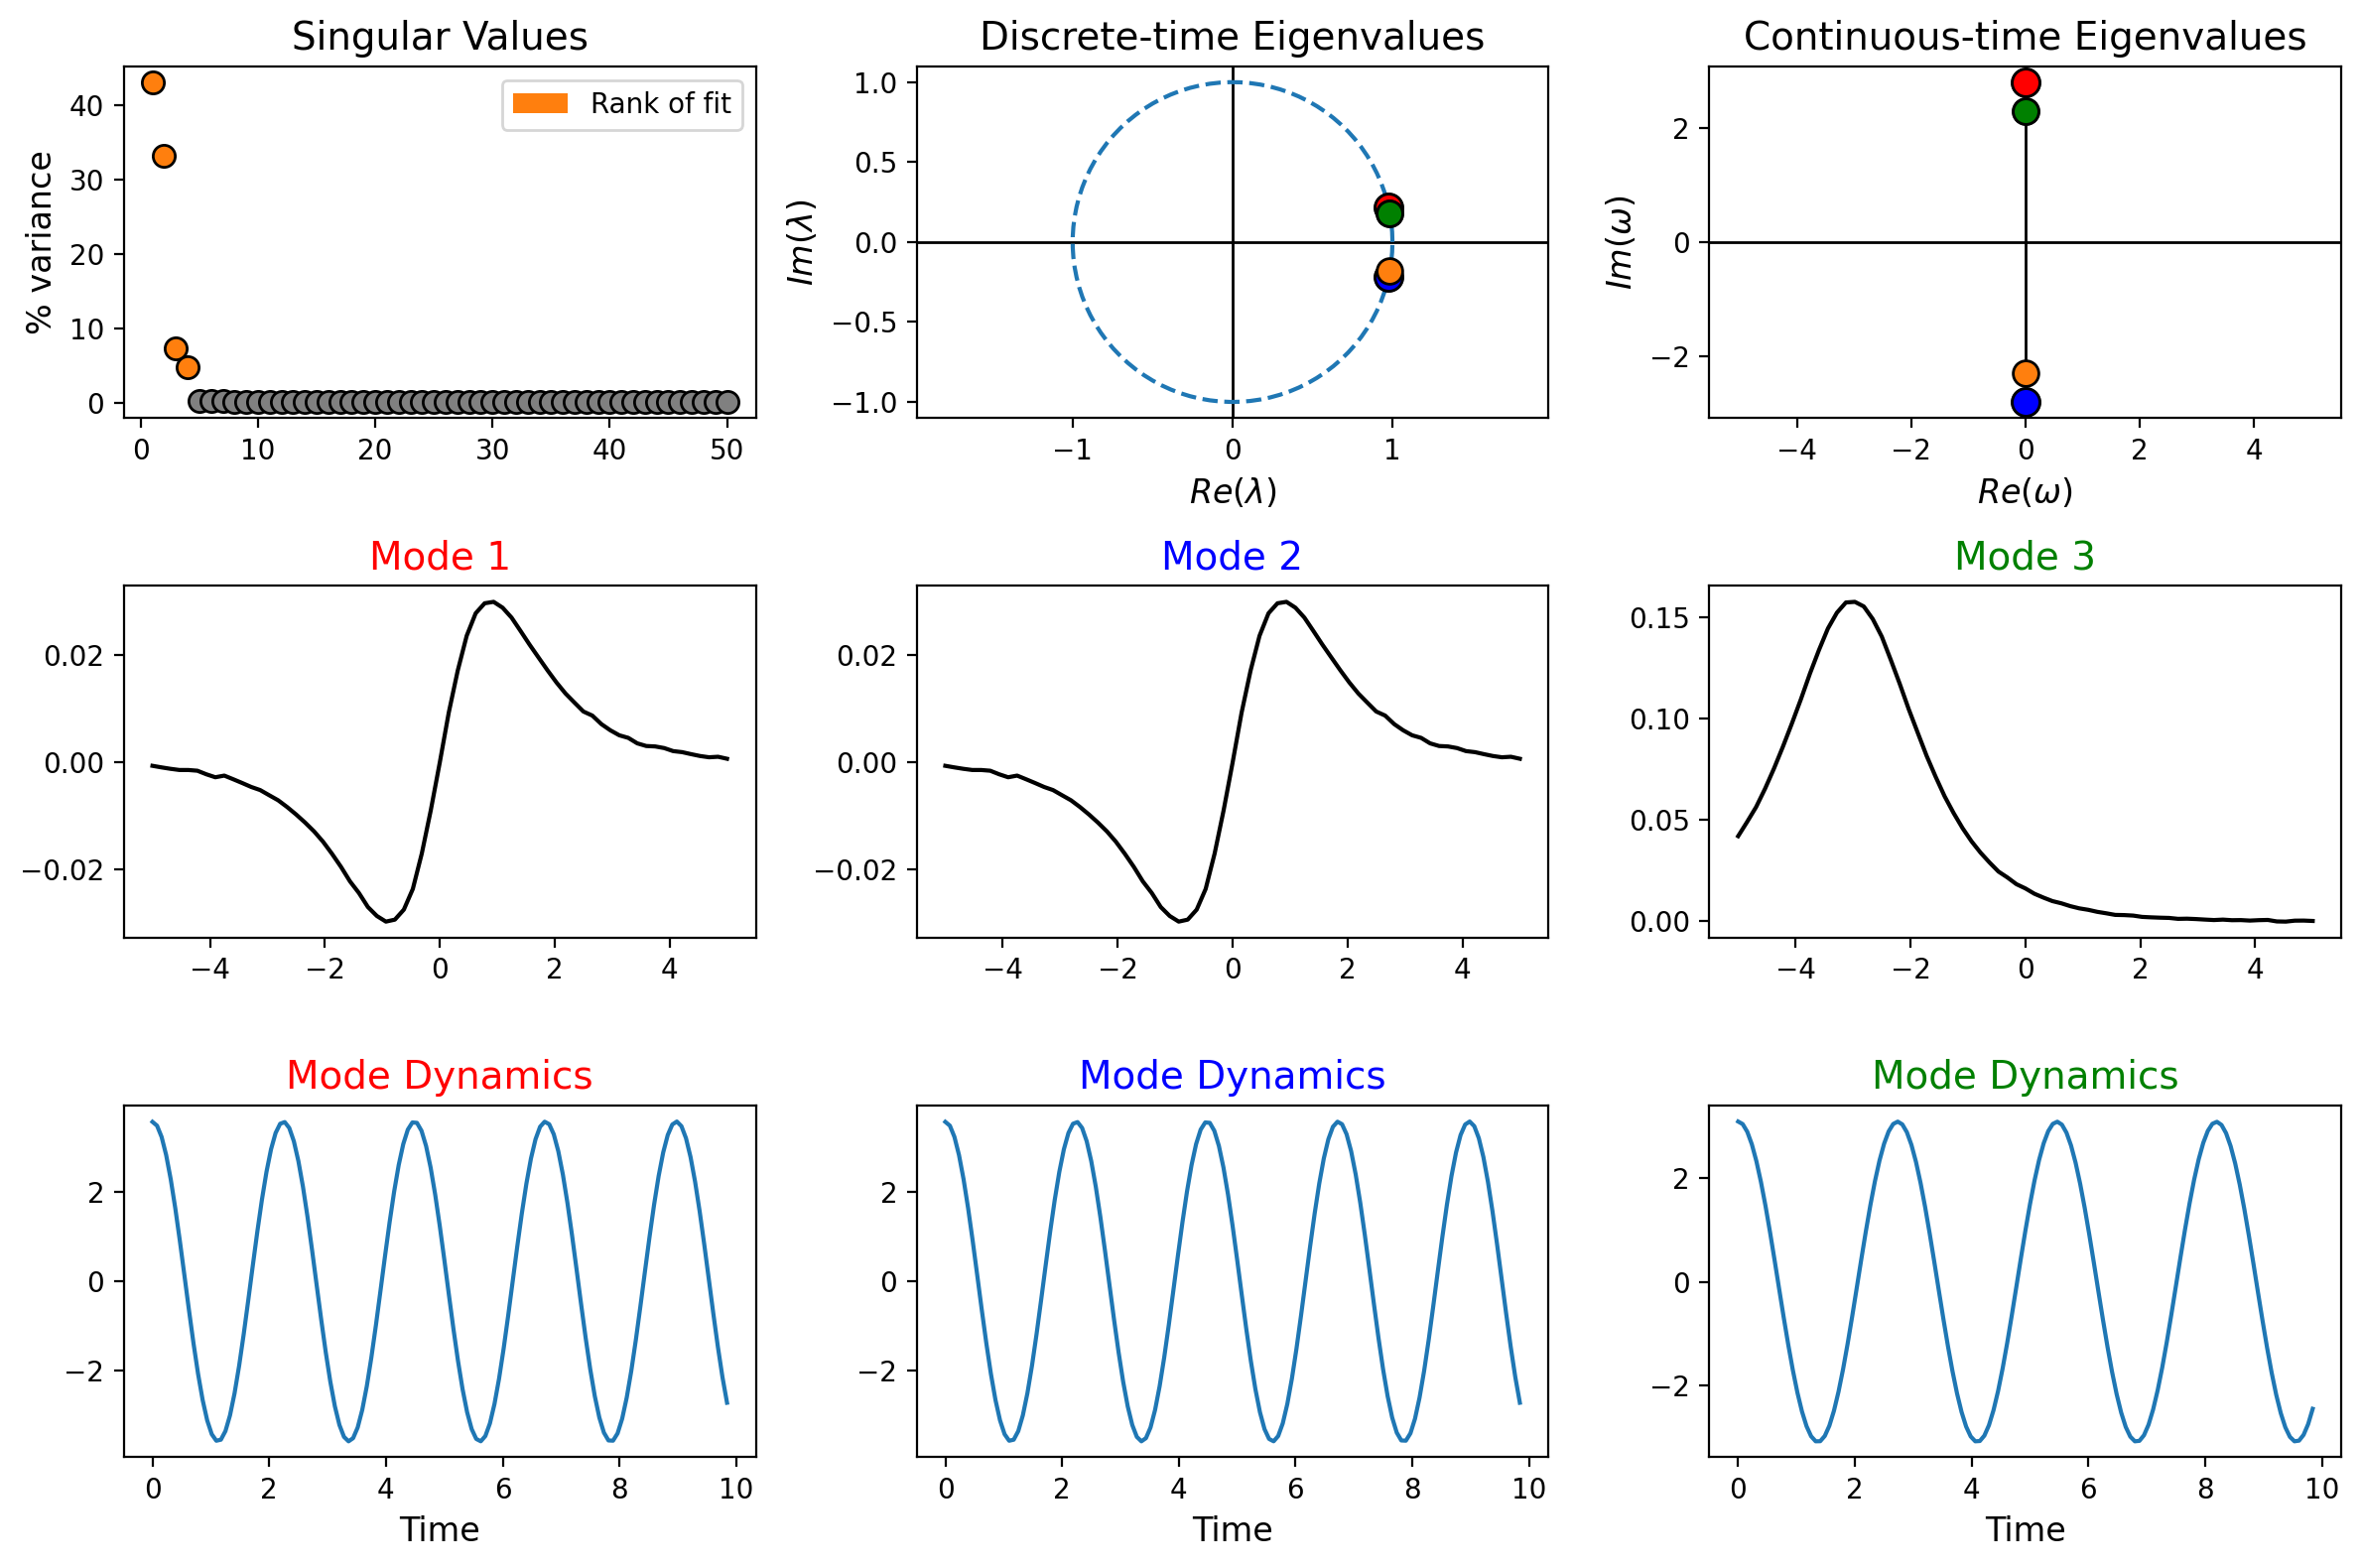

----------------------------
Frequencies (imaginary component): [ 0.+2.8j  0.-2.8j -0.+2.3j -0.-2.3j]
----------------------------


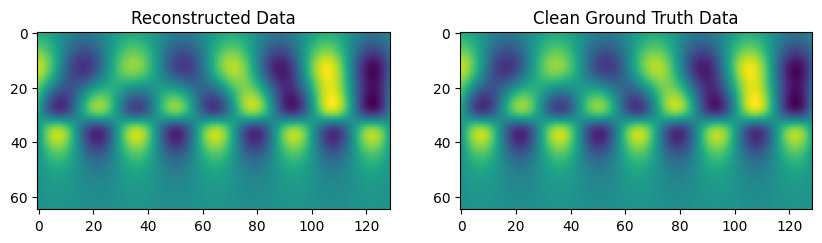

In [5]:
###################################### Preprocesamiento de los datos ##############################

# BOPDMD: Optimized DMD and Bagging, Optimized DMD
# classBOPDMD(svd_rank=0, compute_A=False, use_proj=True, init_alpha=None, proj_basis=None, num_trials=0, trial_size=0.6, eig_sort='auto', eig_constraints=None, bag_warning=100, bag_maxfail=-1, varpro_opts_dict=None
optdmd = BOPDMD(svd_rank=0, num_trials=0,trial_size=0.6)
print("\n")
print(f"El tipo de objeto de la instrancia creada es: {type(optdmd)}")
print("\n")

#Tiene que ser un objeto pydmd.dmdbase.DMDBase
delay_optdmd = hankel_preprocessing(optdmd, d=d)

# Os modelos BOPDMD precisam dos dados X e dos tempos de coleta de dados t para ajuste
# Portanto, se aplicarmos o atraso de tempo, devemos ajustar a duração do nosso vetor de tempo de acordo
# Ajustar el arreglo de tiempo para coincidir con los datos después de aplicar el retraso temporal.

delay_t = t[: -d + 1]

###################################### Procesamiento de los datos ##############################

#Aplicaron el modelo creado  datos con ruido-Principal para hacer rodar la simulacion 
delay_optdmd.fit(Xn.T, t=delay_t)

# El rango usado para la aproximacion SVD (Sistema)
delay_optdmd.svd_rank

# Estimación inicial utilizada para los valores propios de DMD en tiempo continu-array. 
delay_optdmd.fit(Xn.T, t=delay_t).init_alpha

# La base de proyección utilizada, con modos almacenados por columna-Array 
delay_optdmd.fit(Xn.T, t=delay_t).proj_basis

# El número de ensayos BOP-DMD a realizar (Numero)
delay_optdmd.num_trials

# Tamaño de los subconjuntos de datos utilizados durante cada ensayo BOP-DMD.
delay_optdmd.trial_size

# Ejecucion del tiempo 
delay_optdmd.fit(Xn.T, t=delay_t).time

# Operador de Koopman reducido A, llamado Atilde.
delay_optdmd.atilde

# Retorna una Matriz que contiene toda la evolución temporal, almacenada por fila.
delay_optdmd.fit(Xn.T, t=delay_t).dynamics

# Retorna 
delay_optdmd.modes
# Retorna 
delay_optdmd.eigs

print(f"El rango utilizado para la aproximacion por SVD es : {delay_optdmd.svd_rank}")
print(f"La estimacion inicial tiene una longitud de:{len(delay_optdmd.fit(Xn.T, t=delay_t).init_alpha)} y sus elementos son : {np.round(delay_optdmd.fit(Xn.T, t=delay_t).init_alpha,decimals=1)} ")
print(f"El tamanho de la proyeccion, con sus modos  alamcenados por columna es : {delay_optdmd.fit(Xn.T, t=delay_t).proj_basis.shape} ")
print(f"El número de ensayos BOP-DMD a realizar {delay_optdmd.num_trials}")
print(f"El Tamaño de los subconjuntos de datos utilizados durante cada ensayo BOP-DMD {delay_optdmd.trial_size}")
print(f"Se demoro: {delay_optdmd.fit(Xn.T, t=delay_t).time[-1]} [s] ")
print(f"El tipo de archivo de 'atilde' es : {type(delay_optdmd.atilde)} ------ El tamanho de la matriz de 'Modes'  : {delay_optdmd.atilde.shape}")
print(f"El tipo de archivo de 'dynamics' es : {type(delay_optdmd.dynamics)} ------ El tamanho de la matriz de 'dynamics'  : {delay_optdmd.dynamics.shape}")
print(f"El tipo de archivo de 'modes' es : {type(delay_optdmd.modes)} ------ El tamanho de la matriz de 'modes'  : {delay_optdmd.modes.shape}")
print(f"El tipo de archivo de `eigs` es : {type(delay_optdmd.eigs)} ------ El tamanho de la matriz de `eigs`  : {delay_optdmd.eigs.shape}")
print(f"El tipo de archivo de `Original` es : {type(X)} ------ El tamanho de la matriz de `Original`  : {X.shape}")
print(f"El tipo de archivo de `reconstructed_data` es : {type(delay_optdmd.reconstructed_data.real)} ------ El tamanho de la matriz de `reconstructed_data`  : {delay_optdmd.reconstructed_data.real.shape}")
print(f"El determinante 'Original' es {np.linalg.norm(X):.3f}")
print(f"El determinante 'Reconstruido' es {np.linalg.norm(delay_optdmd.reconstructed_data.real):.3f}")

###################################### Visualizacion de los datos ##############################

# Plot a summary of the DMD results.
# Vulven los resultados con la misma longitud "X" inicial 
print("----------------------------")
plot_summary(delay_optdmd, x=x, d=d)
print("----------------------------")

# Print computed eigenvalues (frequencies are given by imaginary components).
print(f"Frequencies (imaginary component): {np.round(delay_optdmd.eigs, decimals=3)}")
print("----------------------------")


# Reconstruccion de los datos 

# Criar uma figura com dois subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Definir título para o primeiro subplot
axs[0].set_title("Reconstructed Data")

# Plotar a imagem do dado reconstruído
axs[0].imshow(delay_optdmd.reconstructed_data.real)

# Definir título para o segundo subplot
axs[1].set_title("Clean Ground Truth Data")

# Plotar a imagem do dado verdadeiro
axs[1].imshow(X.T)

# Exibir o gráfico
plt.show()

# O objeto DMD contém as principais informações sobre a decomposição:

-o atributo `modes` uma matriz numpy 2D onde as colunas são as estruturas de baixo escalão individualizadas

-o atributo `dynamics` é um array numpy 2D onde as linhas referem-se à evolução temporal de cada modo

-o atributo `eigs`  refere-se aos autovalores do operador de baixa dimensão

-o atributo `amplitudes` fornece os coeficientes do modo espaço-temporal usados ​​para reconstrução

-o atributo `reconstructed_data` refere-se à evolução aproximada do sistema

Embora esses atributos possam ser acessados ​​diretamente de um objeto DMD ajustado, conforme demonstrado abaixo, notamos que a função plot_summary plota automaticamente uma visão resumida de muitos desses atributos


(3, 65)
(3, 65)
(3, 65)
(3, 65)


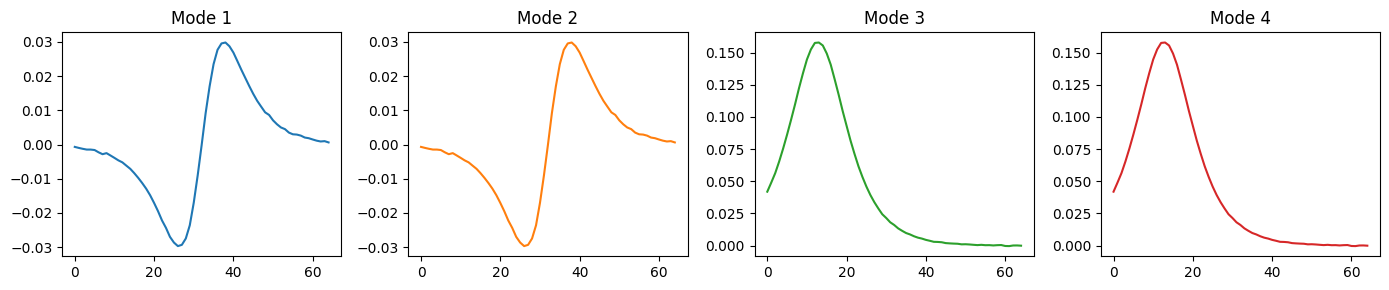

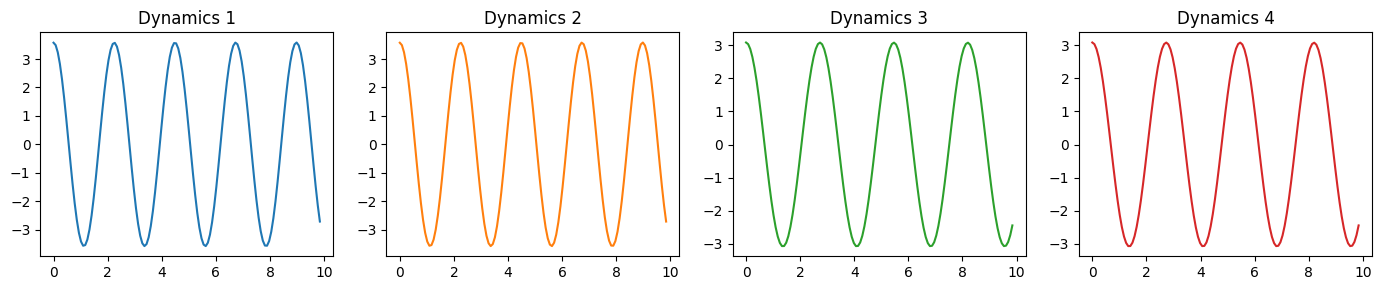

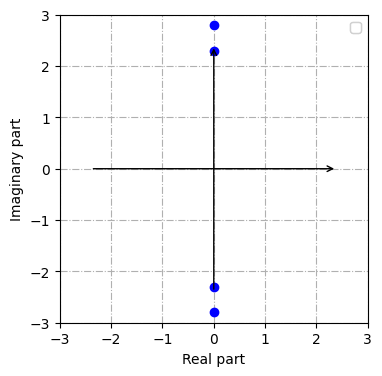

Computed amplitudes: [3.572 3.572 3.076 3.076]



In [6]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]


#Plot de los modos, en este caso de los 4 primeros 

plt.figure(figsize=(14, 3))

for i, mode in enumerate(delay_optdmd.modes.T):

    # (325x4)=(325x4).T

    # método utilizado para alterar a forma (shape) de um array NumPy sem alterar seus dados. 
    # Queda un array de (65 elementos )

    
    x=mode.reshape(d, len(mode) // d)

    print(x.shape)

    # Queda como una matriz de (5x65)
    mode = np.average(mode.reshape(d, len(mode) // d), axis=0)

    plt.subplot(1, len(delay_optdmd.modes.T), i + 1)

    plt.plot(mode.real, c=colors[i])

    plt.title(f"Mode {i + 1}")
    
plt.tight_layout()
plt.show()

# Plotting the dynamics individually...
plt.figure(figsize=(14, 3))
for i, dynamic in enumerate(delay_optdmd.dynamics):
    plt.subplot(1, len(delay_optdmd.dynamics), i + 1)
    plt.plot(delay_t, dynamic.real, c=colors[i])
    plt.title(f"Dynamics {i + 1}")
plt.tight_layout()
plt.show()

# Plot the eigenvalues.
plot_eigs(delay_optdmd, show_axes=True, show_unit_circle=False, figsize=(4, 4))

# Print the amplitudes.
print(f"Computed amplitudes: {np.round(delay_optdmd.amplitudes, decimals=3)}\n")

# Etapa 3: DMD com restrições

Os modelos BOPDMD também têm a opção de especificar a estrutura dos autovalores que calculam. Mais especificamente, os usuários podem impor as seguintes restrições, bem como qualquer combinação válida delas.

-Estável: restringe os valores próprios para que tenham partes reais não positivas.

-Imaginário: restringe os autovalores a serem puramente imaginários.

-Pares conjugados: restringe os autovalores para que sempre apareçam com seu conjugado complexo.

Isso pode ser especialmente útil para lidar com ruídos e prevenir o crescimento/deterioração de sua dinâmica.

Observe que, ao realizar essa etapa extra, os autovalores calculados pelo BOP-DMD agora são perfeitamente imaginários e agora vêm em pares conjugados complexos perfeitos. Observe também que isso é detectado automaticamente por plot_summary, que agora plota os pares de autovalores conjugados complexos e seus respectivos modos na mesma cor.

Frequencies (imaginary component): [ 0.+2.8j -0.-2.8j  0.+2.3j -0.-2.3j]


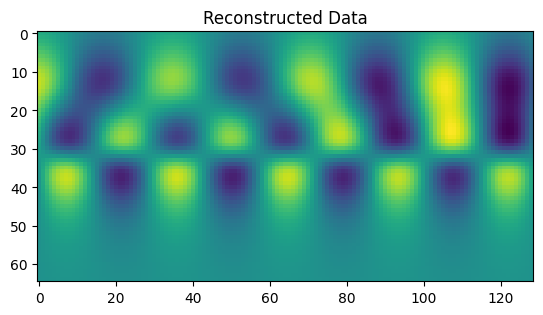

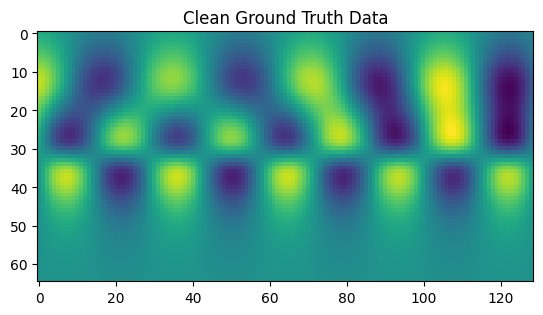

In [7]:
# CONSTRAINTS
optdmd = BOPDMD(
    svd_rank=4, num_trials=0, eig_constraints={"imag", "conjugate_pairs"}
)
delay_t = t[: -d + 1]
delay_optdmd = hankel_preprocessing(optdmd, d=d)
delay_optdmd.fit(Xn.T, t=delay_t)



print(
    f"Frequencies (imaginary component): {np.round(delay_optdmd.eigs, decimals=3)}"
)
plt.title("Reconstructed Data")
plt.imshow(delay_optdmd.reconstructed_data.real)
plt.show()
plt.title("Clean Ground Truth Data")
plt.imshow(X.T)
plt.show()

# Por que precisamos de atraso de tempo?
Como nossos dados são reais e os modos espaciais subjacentes são estacionários, nem sempre podemos obter resultados corretos se aplicarmos o DMD diretamente ao nosso conjunto de dados, mesmo se usarmos o truncamento de classificação adequado.

O atraso de tempo ajuda a mitigar isso, dando-nos mais observações para trabalhar. Como você verá abaixo, nossos dados limpos revelam 2 valores singulares dominantes, e se tentarmos aplicar DMD sem atraso, obteremos resultados absurdos.

No entanto, se aplicarmos qualquer número de incorporações de atraso de tempo, isso aumentará esse número de valores singulares de 2 para 4, permitindo-nos extrair de forma mais consistente a estrutura de classificação 4 que esperamos. É por isso que usamos d=2 ao longo deste tutorial. Qualquer número de atrasos maior que 1 é suficiente, desde que tenhamos instantâneos temporais suficientes.

Observe que esta etapa de pré-processamento pode ou não ser necessária dependendo do seu conjunto de dados específico. Portanto, a coisa mais prática a fazer durante qualquer aplicação DMD é examinar o espectro de valores singulares de seus dados à medida que você aplica incorporações de atraso de tempo.


# Isto é o que acontece sem atraso (usando dados limpos e DMD exato):

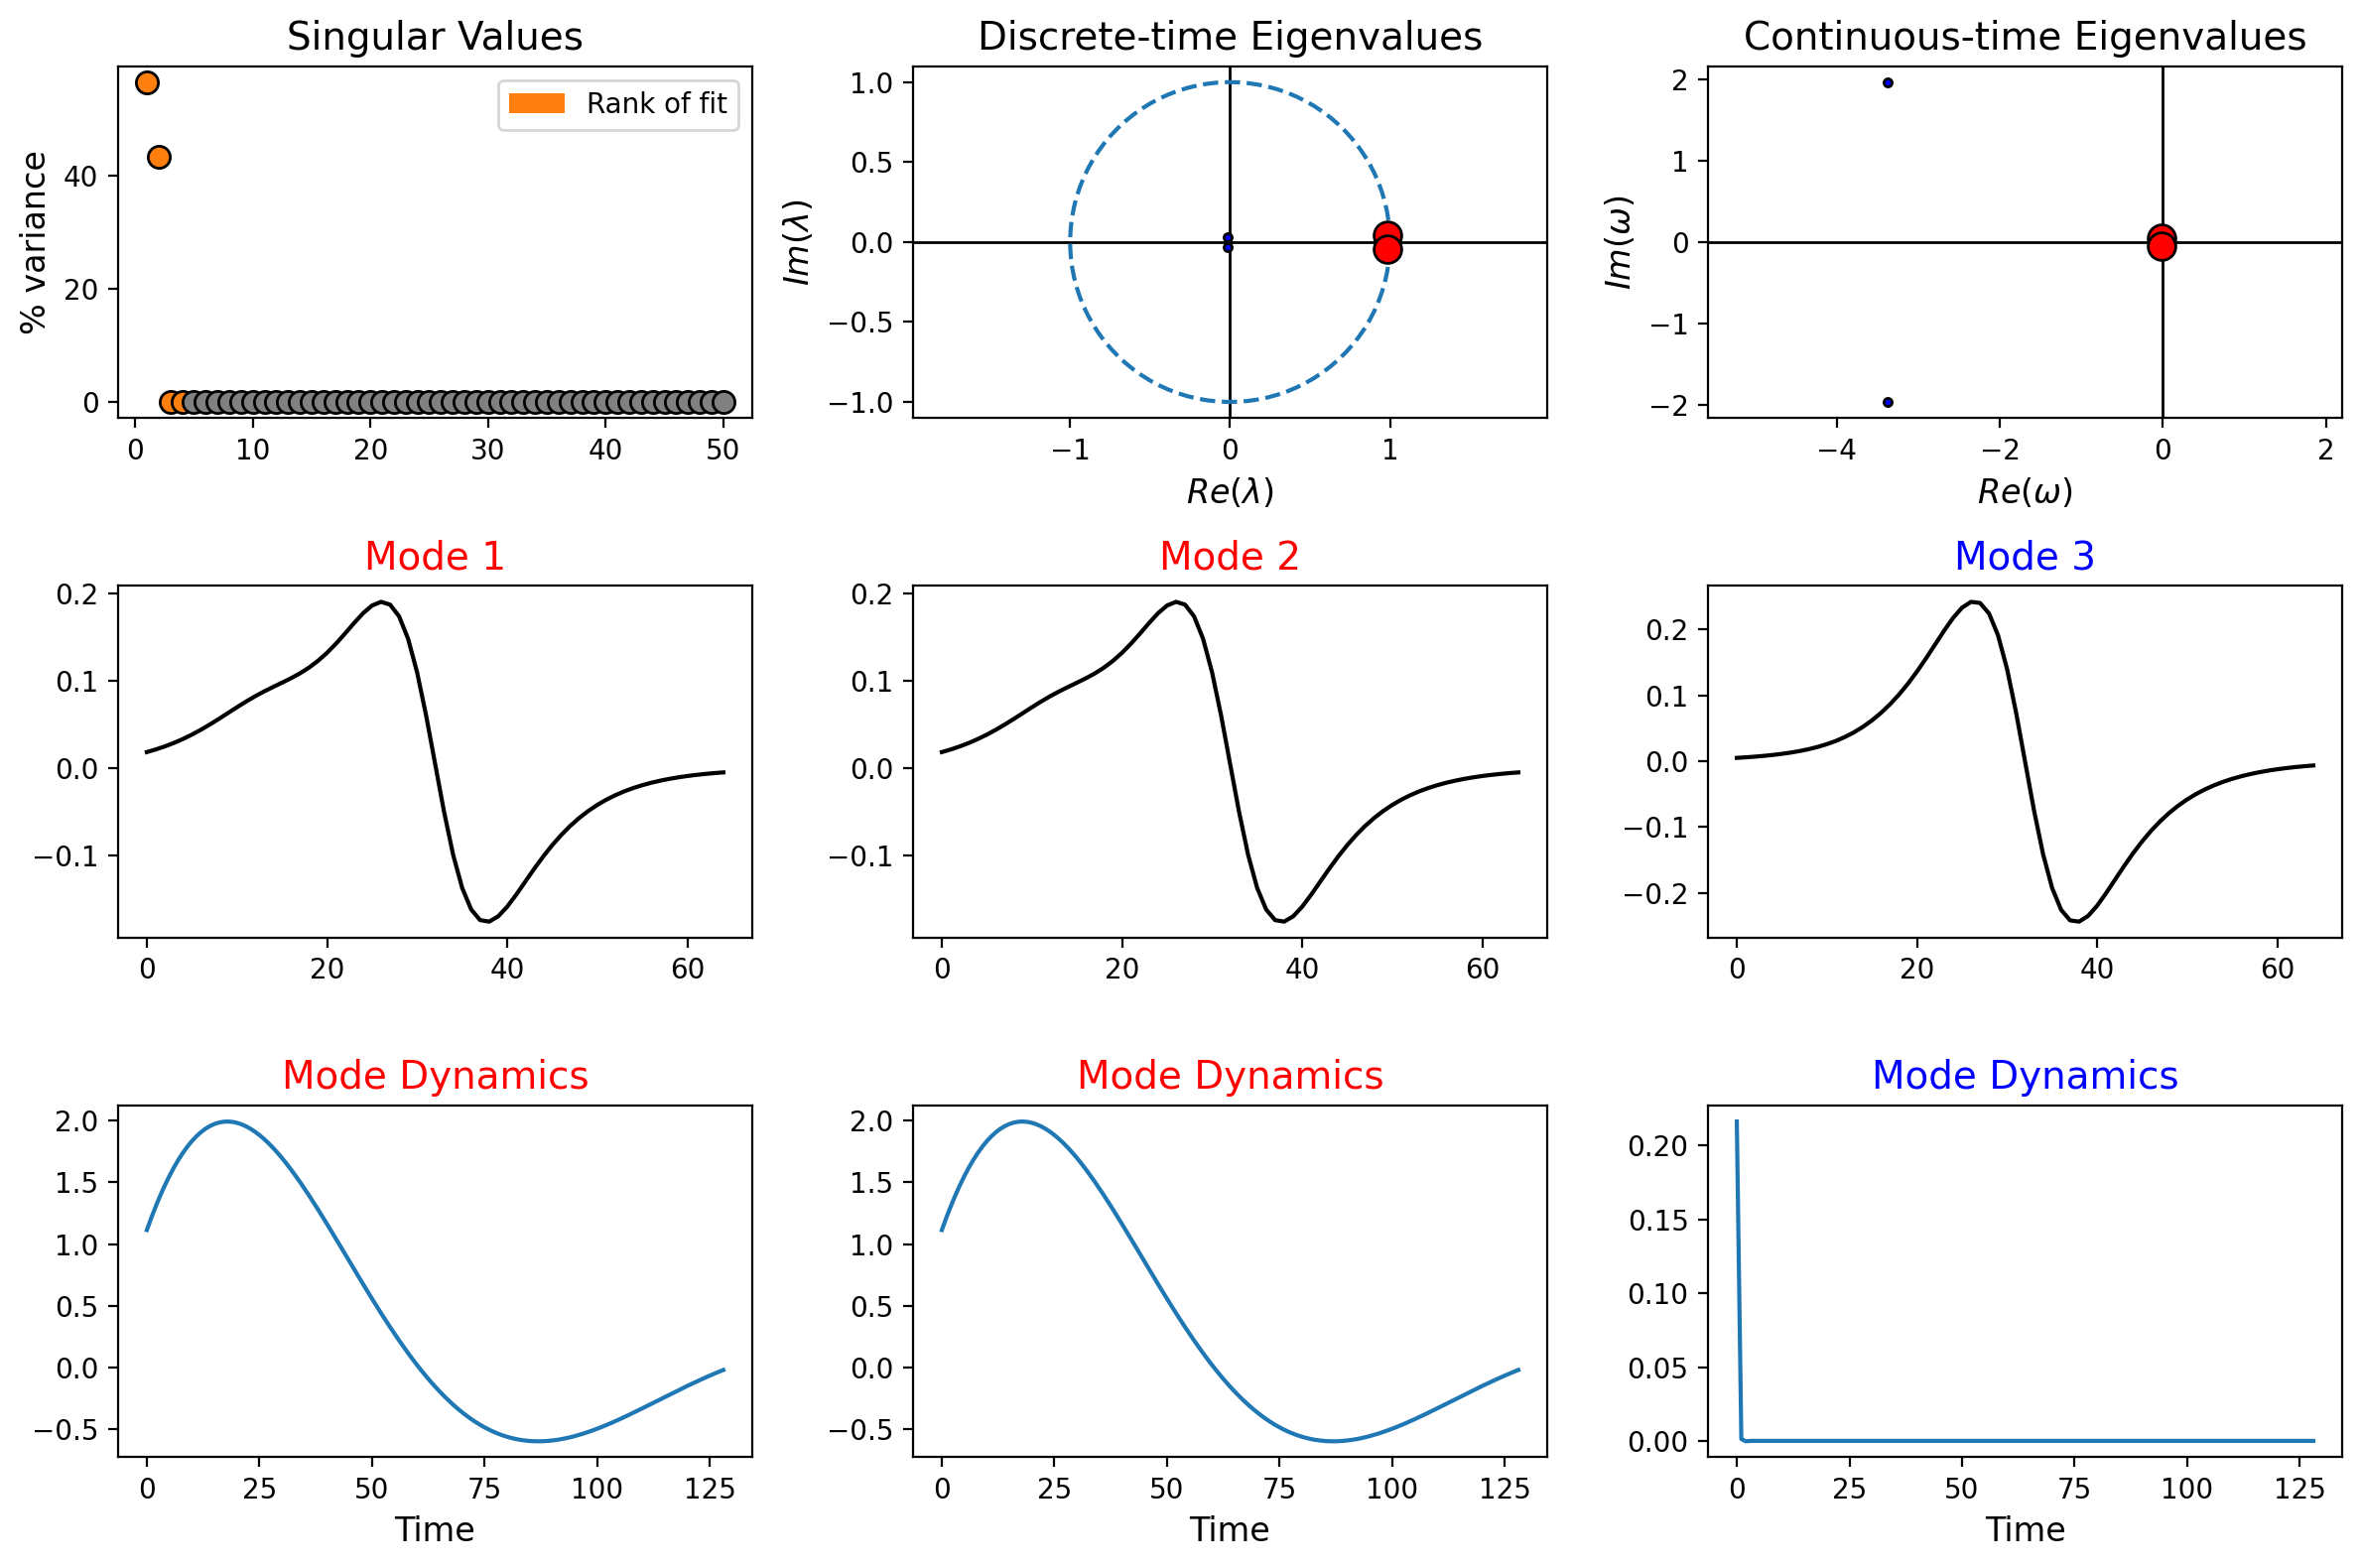

Frequencies (imaginary component): [ -0.223 +0.583j  -0.223 -0.583j -43.236+25.101j -43.236-25.101j]


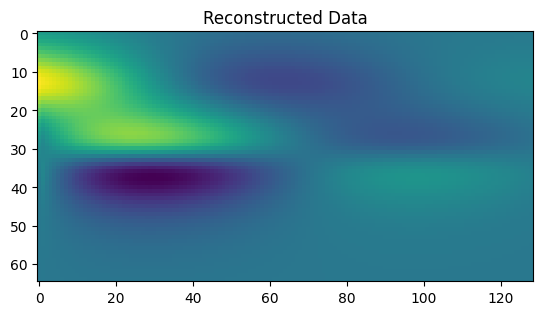

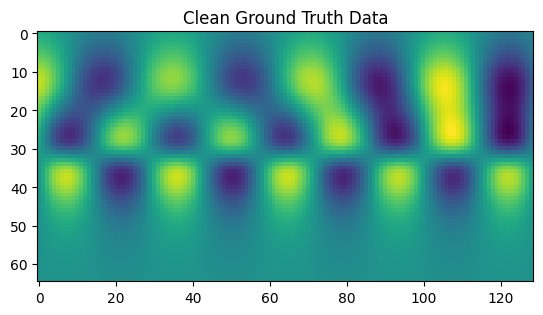

In [8]:
dmd = DMD(svd_rank=4)

dmd.fit(X.T)

plot_summary(dmd)


print(
    f"Frequencies (imaginary component): {np.round(np.log(dmd.eigs) / dt, decimals=3)}"
)
plt.title("Reconstructed Data")
plt.imshow(dmd.reconstructed_data.real)
plt.show()
plt.title("Clean Ground Truth Data")
plt.imshow(X.T)
plt.show()

# Por que usamos BOP-DMD?
O BOP-DMD é extremamente robusto para medir ruído, por isso é o método preferido ao lidar com dados do mundo real. Por outro lado, os resultados do DMD exato são extremamente sensíveis ao ruído de medição.

Abaixo, demonstramos o que pode acontecer se você aplicar DMD exato a dados não perfeitos. Observe o decaimento do início da dinâmica pelo viés nos autovalores. Observe também como quando realizamos esse ajuste anteriormente, mas com BOP-DMD, não observamos tal decaimento, mas recuperamos a dinâmica oscilatória esperada.



# Isto é o que acontece quando usamos DMD exato em vez de BOP-DMD:

ValueError: x and y must have same first dimension, but have shapes (3, 65) and (65,)

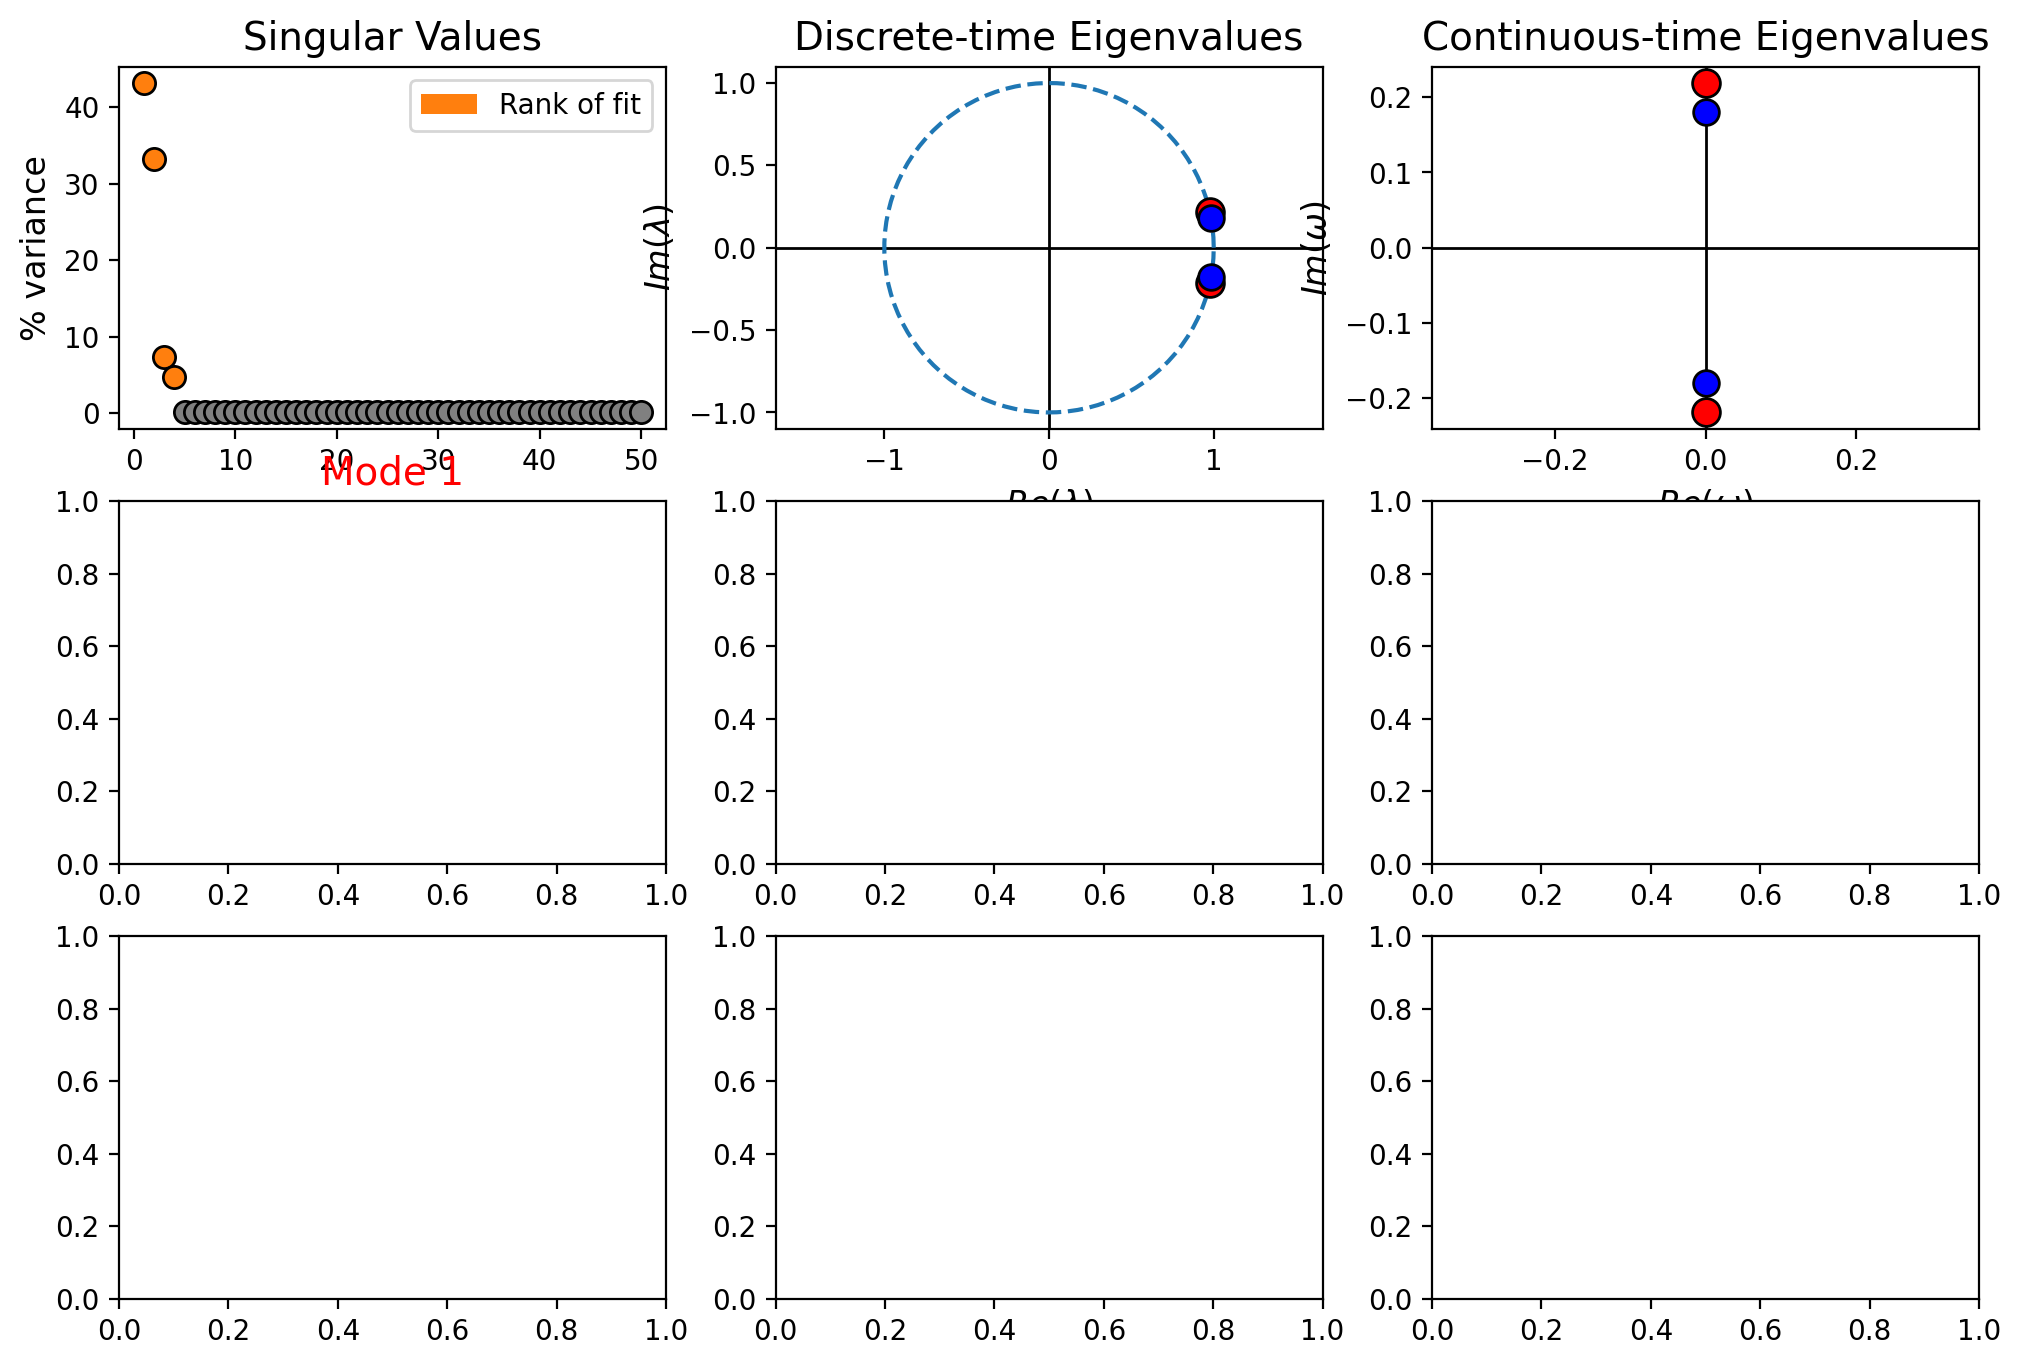

In [9]:
dmd = DMD(svd_rank=0)

delay_dmd = hankel_preprocessing(dmd, d=d)

delay_dmd.fit(Xn.T)

plot_summary(delay_dmd, x=x, d=d)

print(
    f"Frequencies (imaginary component): {np.round(np.log(delay_dmd.eigs) / dt, decimals=3)}"
)
plt.title("Reconstructed Data")
plt.imshow(delay_dmd.reconstructed_data.real)
plt.show()
plt.title("Clean Ground Truth Data")
plt.imshow(X.T)
plt.show()